In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

path=r"C:\Users\deepa\Downloads\placement.csv"
df=pd.read_csv(path)

In [3]:
df.sample(5)

,cgpa,placement_exam_marks,placed
896,5.73,38.0,0
146,6.75,22.0,1
518,7.53,22.0,0
100,6.56,46.0,0
782,7.65,41.0,0


C:\Users\deepa\AppData\Local\Temp\ipykernel_28868\3494644258.py:11: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['cgpa'])
C:\Users\deepa\AppData\Local\Temp\ipykernel_28868\3494644258.py:14: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['placement_exam_marks'])


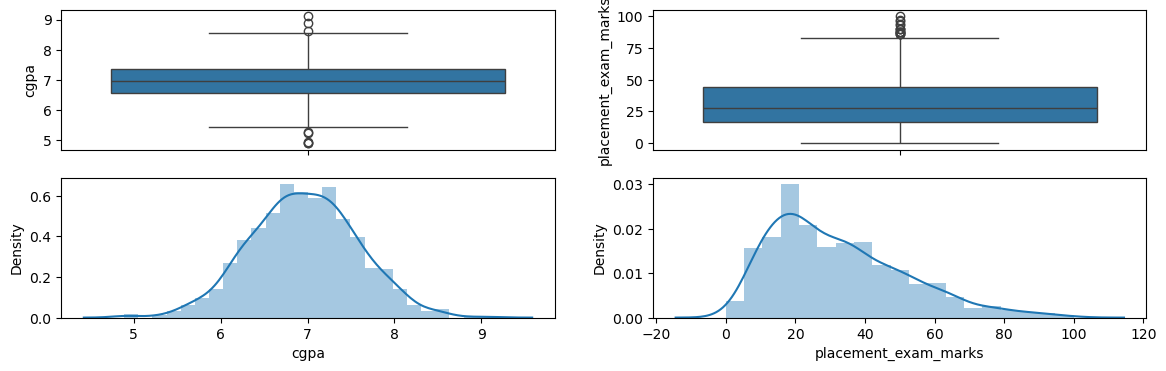

In [5]:
# check is any outlier in this dataset

plt.figure(figsize=(14,4))
plt.subplot(2,2,1)
sns.boxplot(df['cgpa'])

plt.subplot(2,2,2)
sns.boxplot(df['placement_exam_marks'])

plt.subplot(2,2,3)
sns.distplot(df['cgpa'])

plt.subplot(2,2,4)
sns.distplot(df['placement_exam_marks'])

plt.show()

In [6]:
# so there are outliers,we are gonna use IQR METHOD that is applicable on the skewed data
df['cgpa'].skew()

np.float64(-0.014529938929314918)

In [8]:
# it is skewed
df['placement_exam_marks'].skew()

np.float64(0.8356419499466834)

In [9]:
df.describe()

,cgpa,placement_exam_marks,placed
count,1000.000000,1000.000000,1000.000000
mean,6.961240,32.225000,0.489000
std,0.615898,19.130822,0.500129
min,4.890000,0.000000,0.000000
25%,6.550000,17.000000,0.000000
50%,6.960000,28.000000,0.000000
75%,7.370000,44.000000,1.000000
max,9.120000,100.000000,1.000000


In [10]:
q1=df['placement_exam_marks'].quantile(0.25)
q3=df['placement_exam_marks'].quantile(0.75)

In [12]:
q3

np.float64(44.0)

In [14]:
# Find the Inter Quantile Range
IQR=q3-q1
IQR

np.float64(27.0)

In [15]:
# we Can treat Outlier by : Trimming,Capping

In [16]:
# Trimming

In [19]:
upper_lim=q3+1.5*IQR
lower_lim=q1-1.5*IQR
upper_lim

np.float64(84.5)

In [20]:
new_df=df[df['placement_exam_marks']<=84.5]

In [23]:
new_df.shape

(985, 3)

In [24]:
df.shape

(1000, 3)

new_df is the Trimmed DataFrame

In [25]:
# compare them plots

C:\Users\deepa\AppData\Local\Temp\ipykernel_28868\2595853479.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['placement_exam_marks'])
C:\Users\deepa\AppData\Local\Temp\ipykernel_28868\2595853479.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(new_df['placement_exam_marks'])


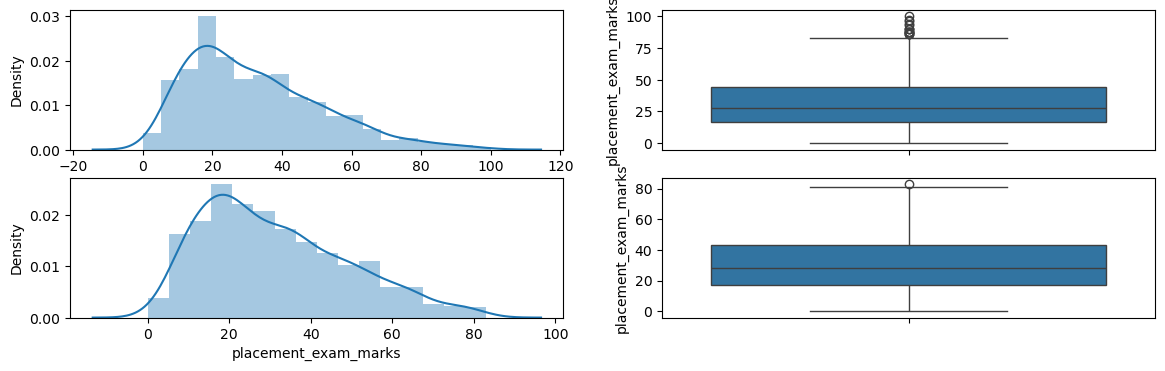

In [27]:
plt.figure(figsize=(14,4))
plt.subplot(2,2,1)
sns.distplot(df['placement_exam_marks'])
plt.subplot(2,2,2)
sns.boxplot(df['placement_exam_marks'])
plt.subplot(2,2,3)
sns.distplot(new_df['placement_exam_marks'])
plt.subplot(2,2,4)
sns.boxplot(new_df['placement_exam_marks'])

plt.show()

In [28]:
# see the difference between the first and the second dist plot after removal of outlier the distplot is the touched the axis after 84.5 that is the upperlimit but in first there are outliers after 84.5 also 
# SO THIS IS THE DIFFERENCE

In [29]:
# NOW IT'S TURN OF CAPPING 

In [30]:
new=df.copy()
new['placement_exam_marks']=np.where(
    new['placement_exam_marks']>84.5,
    upper_lim,
    new['placement_exam_marks']
)
new

,cgpa,placement_exam_marks,placed
0,7.19,26.0,1
1,7.46,38.0,1
2,7.54,40.0,1
3,6.42,8.0,1
4,7.23,17.0,0
...,...,...,...
995,8.87,44.0,1
996,9.12,65.0,1
997,4.89,34.0,0
998,8.62,46.0,1


In [31]:
# that's it we have done capping 

In [32]:
# Now we will compare df with new

C:\Users\deepa\AppData\Local\Temp\ipykernel_28868\3863817909.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['placement_exam_marks'])
C:\Users\deepa\AppData\Local\Temp\ipykernel_28868\3863817909.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(new['placement_exam_marks'])


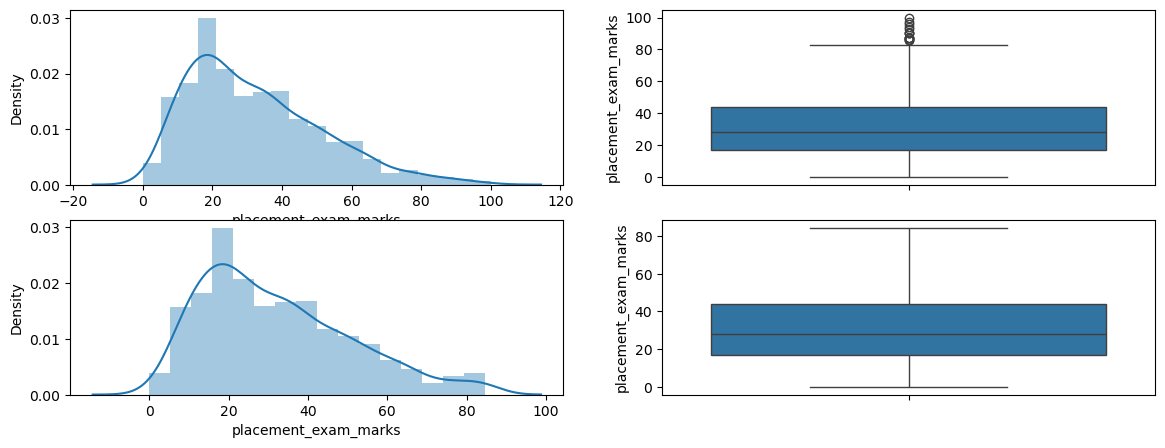

In [34]:
plt.figure(figsize=(14,5))
plt.subplot(2,2,1)
sns.distplot(df['placement_exam_marks'])
plt.subplot(2,2,2)
sns.boxplot(df['placement_exam_marks'])
plt.subplot(2,2,3)
sns.distplot(new['placement_exam_marks'])
plt.subplot(2,2,4)
sns.boxplot(new['placement_exam_marks'])
plt.show()

In [35]:
# ANALYSIS

# see the two distribution plot see the kde plot  for x=84.5 compare them,in second there is more values at 84.5 becoz the outlier has become 84.5 simple logic